In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
data = pd.read_csv('housing data.csv')

In [89]:
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [90]:
# Rows and columns in the data
print('No of Rows:',data.shape[0])
print('No of columns:',data.shape[1])

No of Rows: 1418
No of columns: 13


In [91]:
data.info()
# From info we can see that there are columns like Electrcial, garage type, fence, and misc features
# which have missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


In [92]:
data.describe().T # five point summary

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


In [93]:
# There ar properties where there is no basement
# There are chances of outliers on basement area, Living are, garage area and sale price
# Although Qverall Qual, Full Bath, Garage gars are numbers but they are category

In [94]:
data.describe(include='object').T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


In [95]:
# There in no duplicated rows in the data
data[data.duplicated()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


# Univariate Analysis

In [96]:
# Separate categorical columns and number columns

In [97]:
data.columns

Index(['Id', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical',
       'GrLivArea', 'FullBath', 'GarageType', 'GarageCars', 'GarageArea',
       'Fence', 'MiscFeature', 'SalePrice'],
      dtype='object')

In [98]:
cat_cols= ['OverallQual','Electrical','FullBath','GarageType', 'GarageCars','Fence', 'MiscFeature']
num_cols = ['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']

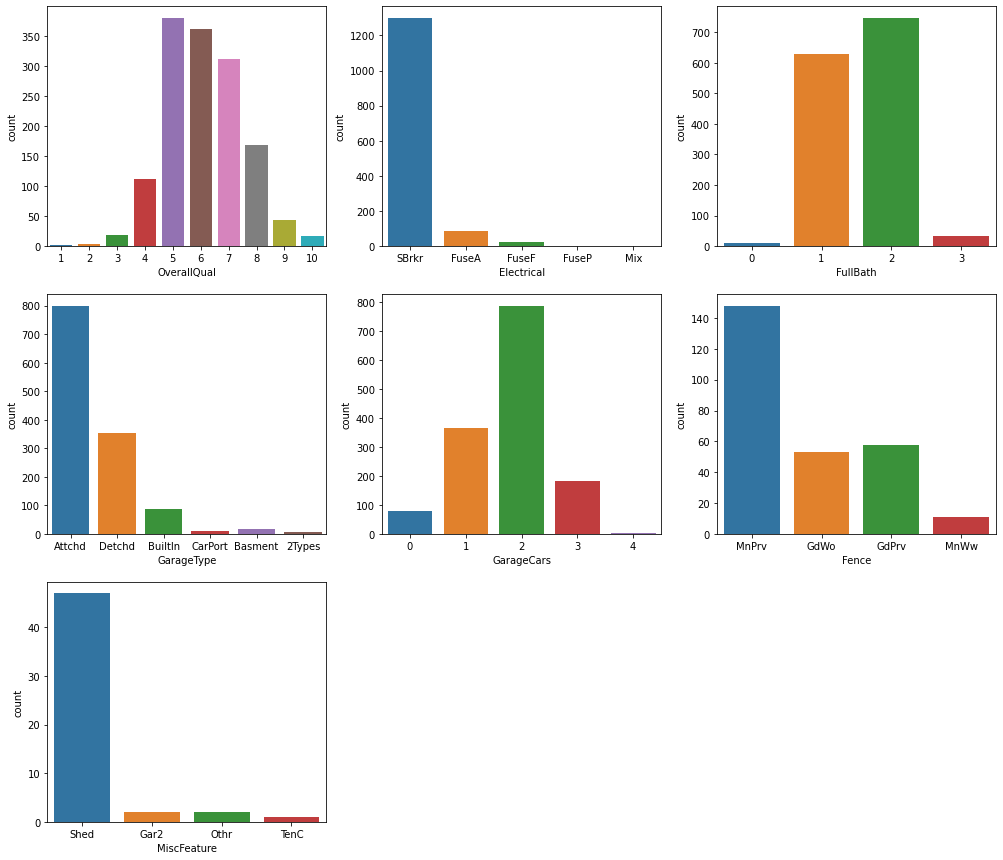

<Figure size 432x288 with 0 Axes>

In [99]:
t=1
plt.figure(figsize=(17,15))
for i in cat_cols:
    plt.subplot(3,3,t)
    sns.countplot(data[i])
    t+=1
plt.show()
plt.tight_layout()

In [100]:
# Maximum properties have overall quality rating 5,6 or 7
# Maximum electrical work is Sbrkr
# Maximum no. of bathrooms are 1 or 2
# Maximum Garage types are Attached or Detached
# Maximum no of cars in Garage is 2

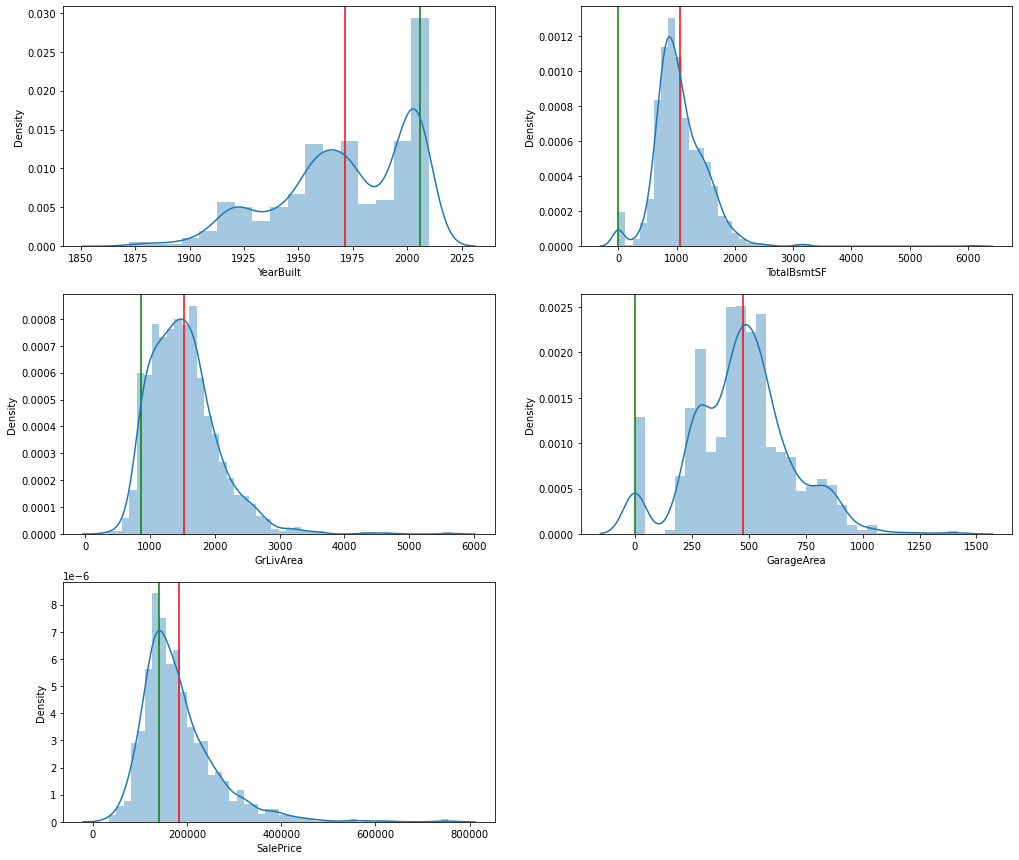

<Figure size 432x288 with 0 Axes>

In [101]:
t=1
plt.figure(figsize=(17,15))
for i in num_cols:
    plt.subplot(3,2,t)
    plt.axvline(data[i].mean(), color='r')
    plt.axvline(data[i].mode()[0],color='g')
    sns.distplot(data[i])
    t+=1
plt.show()
plt.tight_layout()

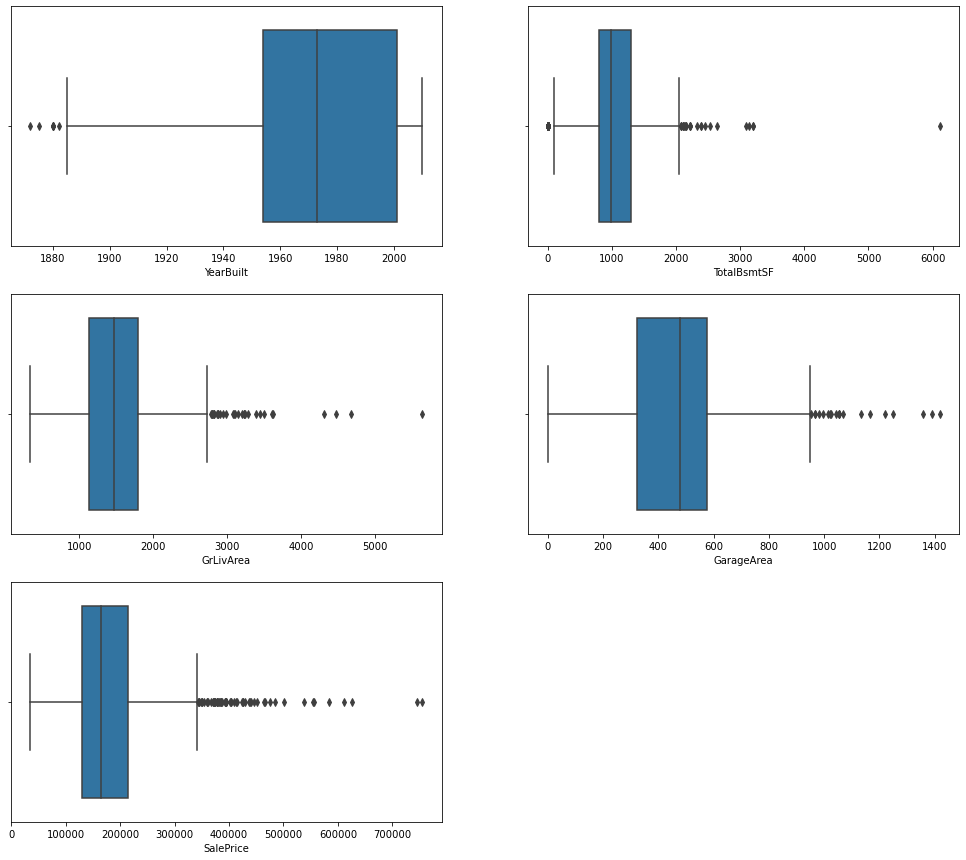

<Figure size 432x288 with 0 Axes>

In [102]:
t=1
plt.figure(figsize=(17,15))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i])
    t+=1
plt.show()
plt.tight_layout()

## Bivariate analysis

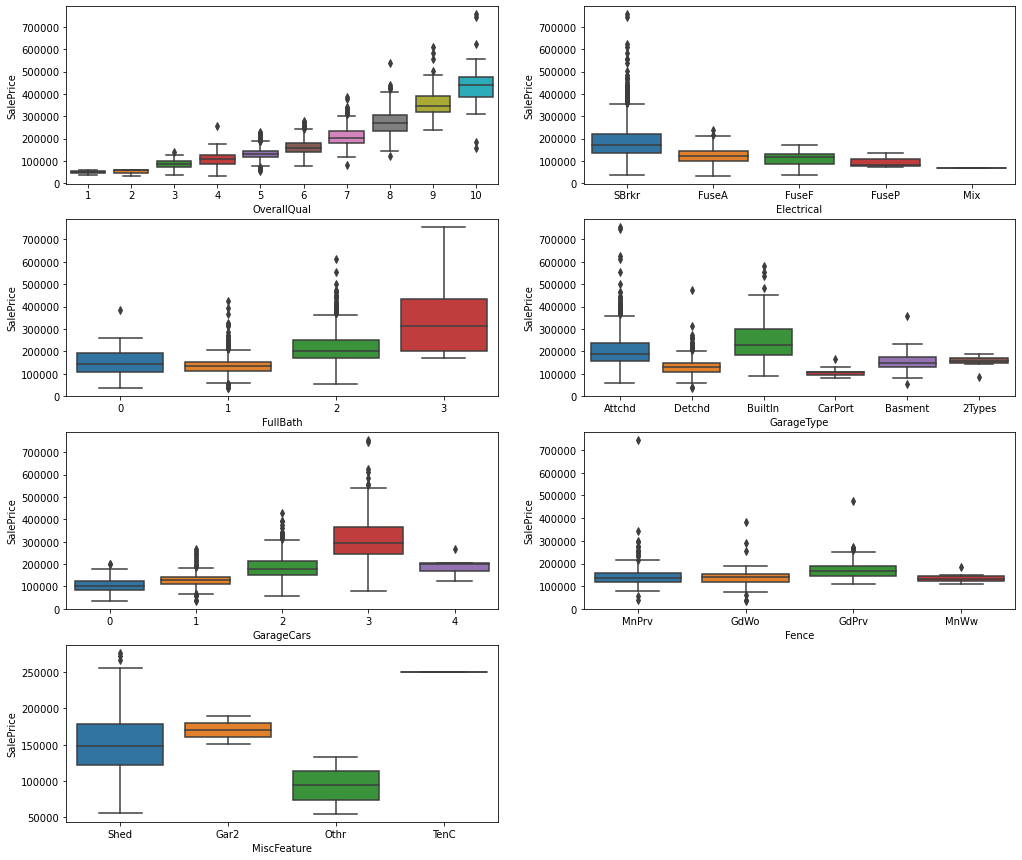

<Figure size 432x288 with 0 Axes>

In [103]:
t=1
plt.figure(figsize=(17,15))
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(x=data[i],y=data['SalePrice'])
    t+=1
plt.show()
plt.tight_layout()

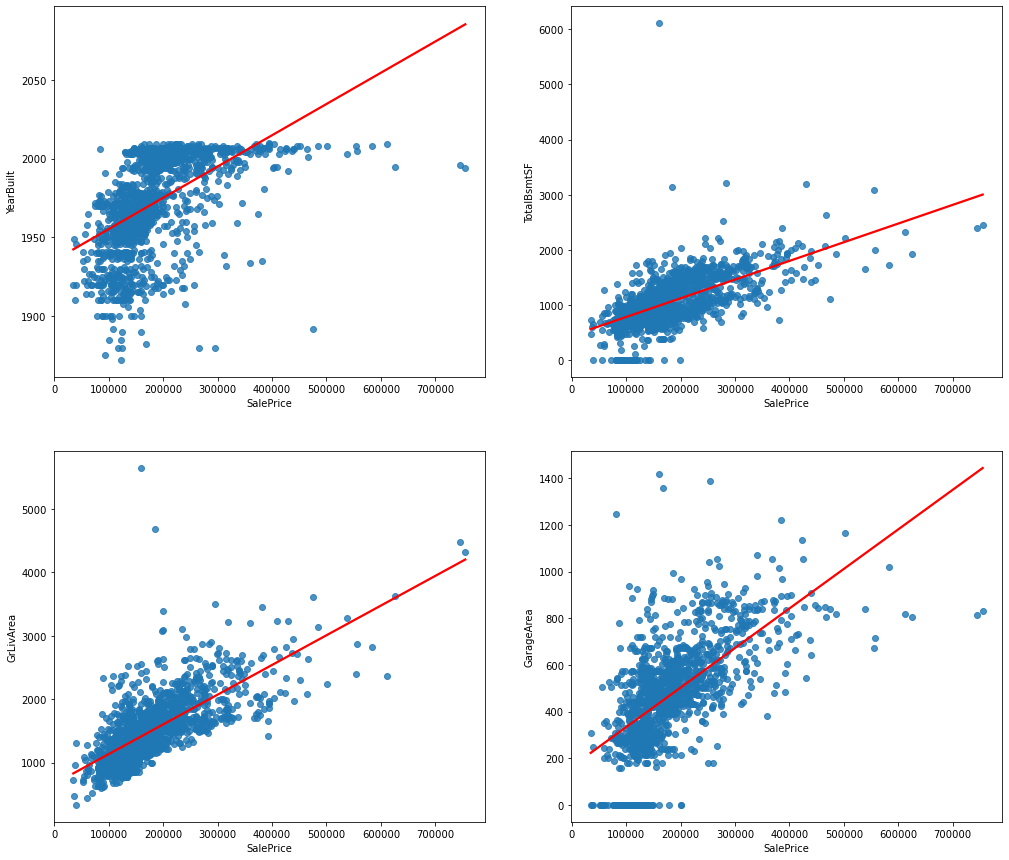

<Figure size 432x288 with 0 Axes>

In [104]:
t=1
plt.figure(figsize=(17,15))
for i in num_cols:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data['SalePrice'],y=data[i],ci=0,line_kws={'color':'r'})
        t+=1
plt.show()
plt.tight_layout()

## Missing Values

In [105]:
data.isnull().sum()

Id                0
OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        1
GrLivArea         0
FullBath          0
GarageType      143
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

In [106]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
Id              0.000000
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [107]:
# Deal with Misc Features and Fence

In [108]:
data['MiscFeature'] = np.where(data['MiscFeature'].isnull(),'No Features','Features')

In [109]:
data['MiscFeature'].value_counts()

No Features    1366
Features         52
Name: MiscFeature, dtype: int64

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

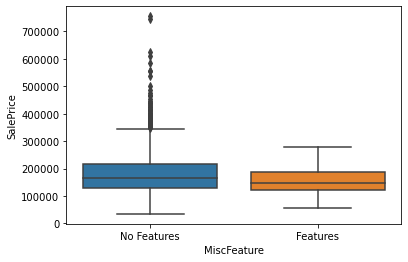

In [110]:
sns.boxplot(data['MiscFeature'],data['SalePrice'])

In [111]:
# Since there is no significant effect of Misc Feature on Sale price. lets drop it
del data['MiscFeature']

In [112]:
data

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,266500
1416,1417,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,142125


In [113]:
data['Fence'] = np.where(data['Fence'].isnull(),'No Fence','Fence')

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

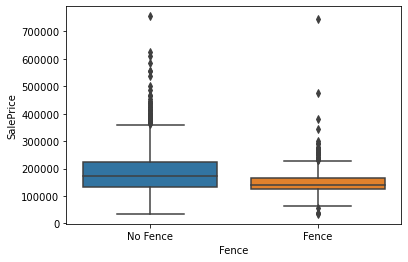

In [114]:
sns.boxplot(data['Fence'],data['SalePrice'])

In [115]:
# Drop the column Fence
del data['Fence']

In [116]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,170000
...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,84500


In [117]:
data['GarageType'] = np.where((data['GarageArea']==0)&(data['GarageCars']==0),'No Garage',data['GarageType'])

In [118]:
data['GarageType'].value_counts()

Attchd       800
Detchd       354
BuiltIn       87
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [119]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,207500
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,170000
47,48,5,1966,955,SBrkr,955,1,NaN,1,386,127000
...,...,...,...,...,...,...,...,...,...,...,...
1263,1264,6,1942,771,SBrkr,1494,1,NaN,1,213,177500
1317,1318,5,1966,864,SBrkr,892,1,NaN,1,264,110000
1357,1358,5,1950,1208,FuseA,1904,1,NaN,1,240,138000
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,119000


In [120]:
data['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [121]:
data[data['GarageCars']==1]['GarageType'].mode()

0    Detchd
Name: GarageType, dtype: object

In [122]:
data['GarageType']= np.where((data['GarageCars']==1)&(data['GarageType'].isnull()),'Detchd',data['GarageType'])

In [123]:
data[data['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,167500


In [124]:
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [125]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

Id             0.0
OverallQual    0.0
YearBuilt      0.0
TotalBsmtSF    0.0
Electrical     0.0
GrLivArea      0.0
FullBath       0.0
GarageType     0.0
GarageCars     0.0
GarageArea     0.0
SalePrice      0.0
dtype: float64

## Outliers

In [126]:
# Instead of dropping lets cap aal these outliers
for i in num_cols:
    q1,q3 = np.quantile(data[i],[0.25,0.75])
    iqr = q3-q1
    ul= q3+(1.5*iqr)
    ll = q1-(1.5*iqr)
    data[i] = np.where(data[i]>ul,ul,data[i])
    data[i] = np.where(data[i]<ll,ll,data[i])

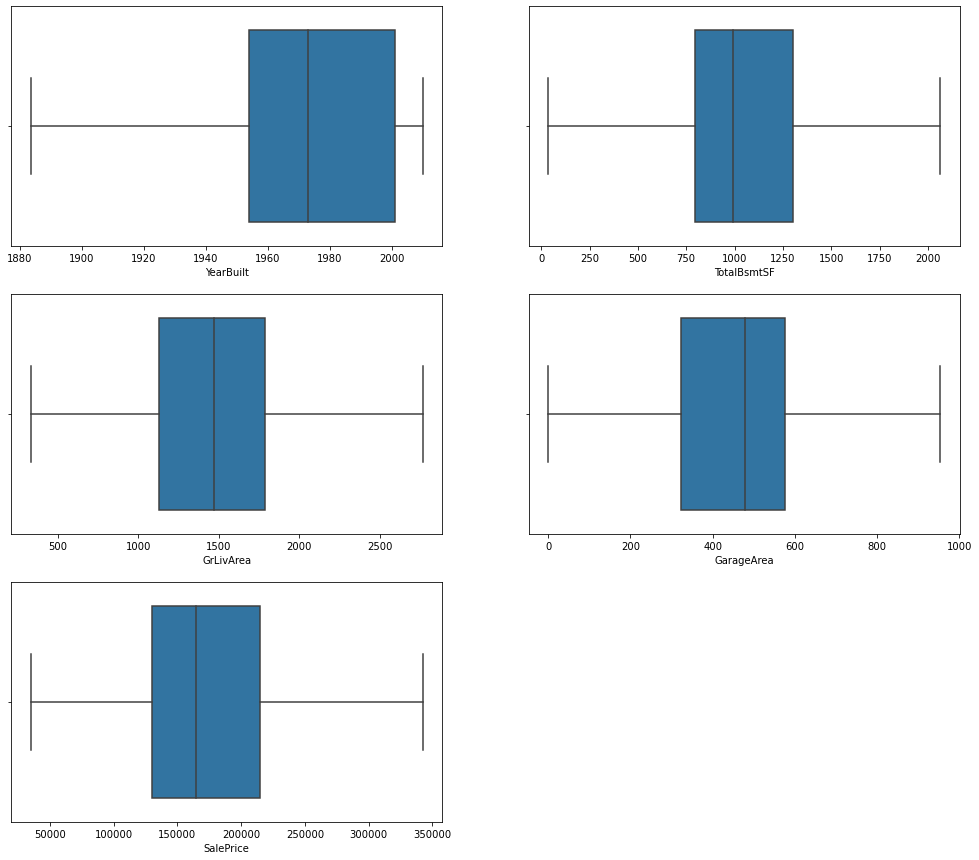

<Figure size 432x288 with 0 Axes>

In [127]:
t=1
plt.figure(figsize=(17,15))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i])
    t+=1
plt.show()
plt.tight_layout()

In [128]:
data.shape

(1418, 11)